# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

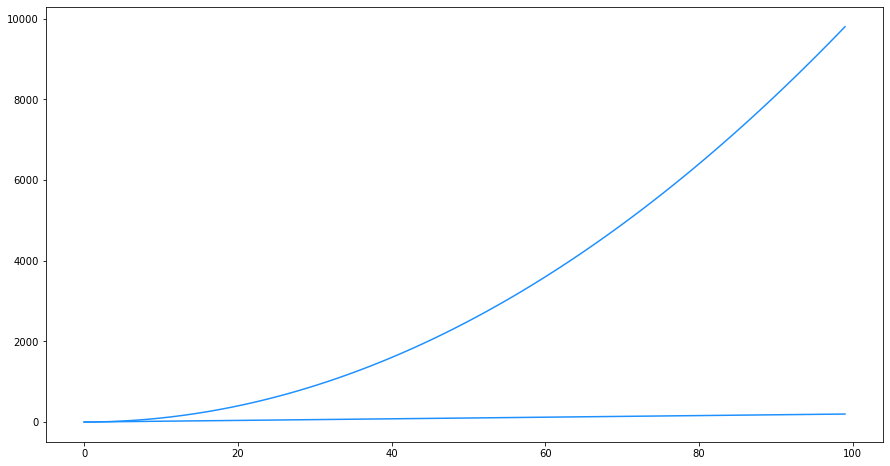

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(15,8))

# First plot
plt.plot(x,y,color='dodgerblue')

# Second plot
plt.plot(x,z,color='dodgerblue')

# # Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

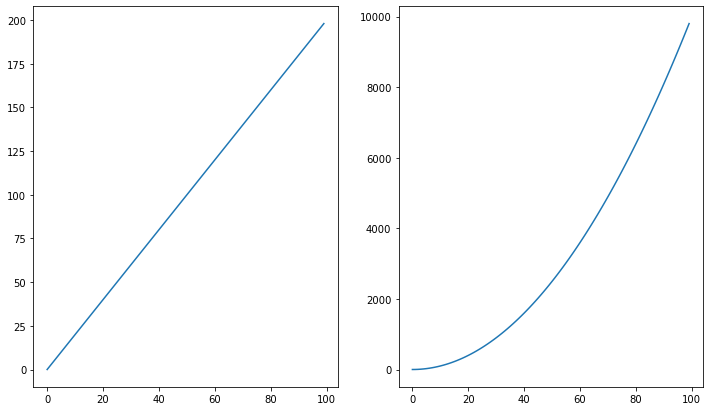

In [4]:
# OPTION 2

# Create a figure of a fixed size and axes
fig, [ax1,ax2] = plt.subplots(ncols=2,nrows=1,figsize=(12,7))
# Plots

ax1.plot(x, y)
ax2.plot(x, z)
# Show the plot
plt.show()

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

([<matplotlib.lines.Line2D at 0x2dc7fc74520>],
 [<matplotlib.lines.Line2D at 0x2dc7fc74880>])

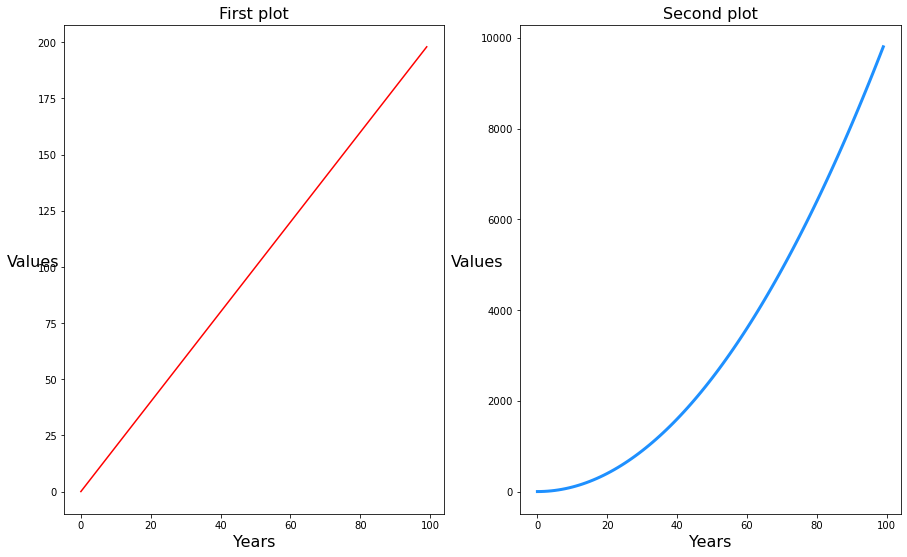

In [5]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation


# Create a figure of a fixed size and axes
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,figsize=(15,9), linewidth=lw)

# First plot adding a title and x and y labels
ax1.set_title('First plot').set_fontsize(fs)
ax1.set_xlabel('Years').set_fontsize(fs)
ax1.set_ylabel('Values',rotation=y_rot, fontsize=fs)
# ax1.label 


# Second plot adding a title and x and y labels
ax2.set_title('Second plot').set_fontsize(fs)
ax2.set_xlabel('Years').set_fontsize(fs)
ax2.set_ylabel('Values',rotation=y_rot, fontsize=fs)


# Show the plot
ax1.plot(x, y,color='red'), ax2.plot(x, z,linewidth=lw,color='dodgerblue') ##

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

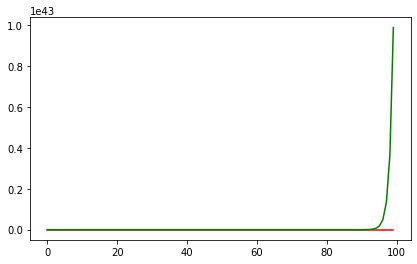

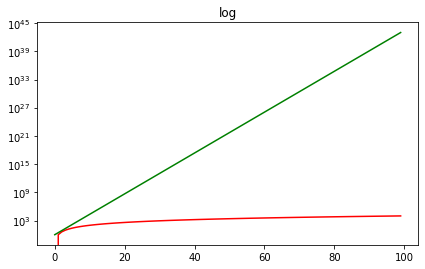

In [6]:
# Create a figure of a fixed size and axes
# fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,9), linewidth=lw)
plt.figure(figsize=(15,9))
x = np.arange(0,100)
y = x**2
z = np.exp(x)
# z = [math.exp(i) for i in x] #

# Normal plot
plt.title('Normal Scale')
plt.subplot(221)
plt.plot(y, 'r')
plt.plot(z, 'g')
plt.yscale('linear')
plt.show()



# # Logarithmic scale
plt.figure(figsize=(15,9))
plt.subplot(222)
plt.title('Logarithmic scale')
plt.plot(y, 'r')
plt.plot(z, 'g')
plt.yscale('log')
plt.title('log')
# Show plot
plt.show()

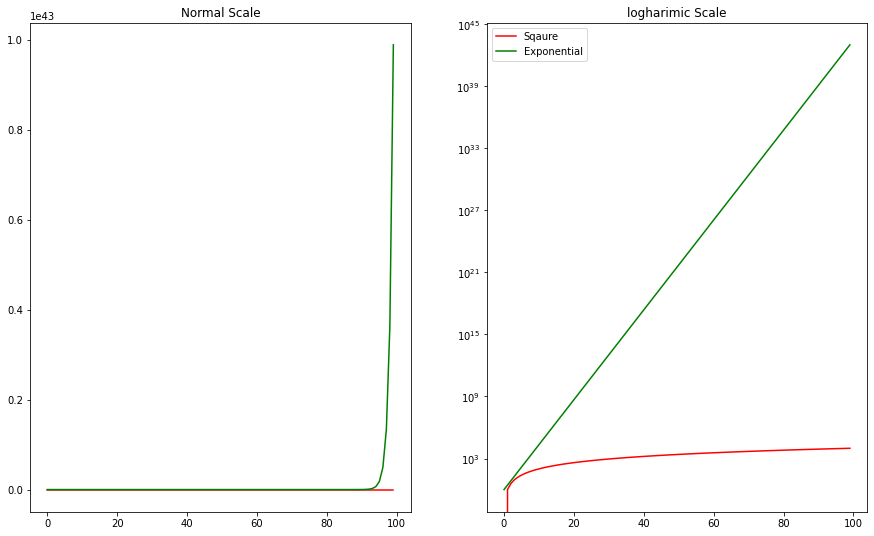

In [7]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,9), linewidth=lw)

ax1 = ax[0]
ax2 = ax[1]
        
# Normal plot
ax1.set_title('Normal Scale')
ax1.plot(y, 'r',label = 'Sqaure')
ax1.plot(z, 'g', label = 'Exponential')
# ax1.set_yscale('linear')

# # Logarithmic scale
ax2.set_title('logharimic Scale')
ax2.plot(y, 'r',label = 'Sqaure')
ax2.plot(z, 'g', label = 'Exponential')
ax2.set_yscale('log')
# ax2.yscale('log')


# Show plot
plt.legend()
plt.show()

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [8]:
# Read the data
df = pd.read_csv('data/Fitbit2.csv')
df.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ]),
 <a list of 9 Text major ticklabel objects>)

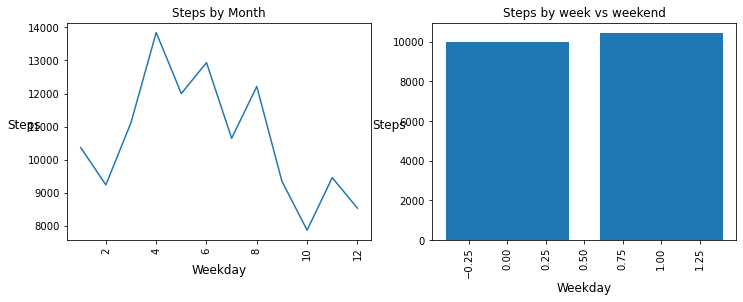

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
df_median = df.groupby('Months_encoded')['Steps'].median().reset_index()

x = df_median.Months_encoded.to_list()

y = df_median.Steps.to_list()

# Create a figure of a fixed size and axes
fig,axs = plt.subplots(nrows=1, ncols=2,figsize=(12,4))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(axs[0])

# Plot the weekday steps in the current axes

plt.plot(x,y)
plt.xticks(rotation ='vertical') 
# Add labels, title, etc
axs[0].set_title('Steps by Month').set_fontsize(12)
axs[0].set_xlabel('Weekday').set_fontsize(12)
axs[0].set_ylabel('Steps',rotation=y_rot, fontsize=12)

# Save the figure

plt.savefig('Steps.png', dpi=300)


# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(axs[1])

# Find the median steps for workdays and weekdays
dfweekend_median = df.groupby('Work_or_Weekend')['Steps'].median().reset_index()

x2 = dfweekend_median.Work_or_Weekend.to_list()

y2 = dfweekend_median.Steps.to_list()

# Plot the workday and weekend steps in the current axes

plt.bar(x2,y2)
# Add labels, title, etc
axs[1].set_title('Steps by week vs weekend').set_fontsize(12)
axs[1].set_xlabel('Weekday').set_fontsize(12)
axs[1].set_ylabel('Steps',rotation=y_rot, fontsize=12)
plt.xticks(rotation ='vertical') 
# Save the figure


#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


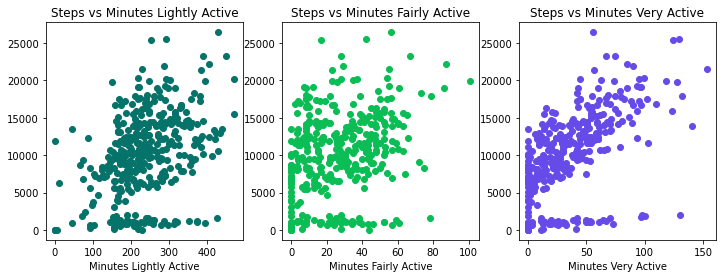

In [10]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
df2 = df[['Minutes Lightly Active','Steps','Minutes Fairly Active','Minutes Very Active']]

# Create a figure of a fixed size and axes
# plt.figure(figsize=(15,8))
fig,axs = plt.subplots(nrows=1, ncols=3,figsize=(12,4))

i = 0
for col in [col for col in df2.columns if col != 'Steps']:
    axs[i].set_title('Steps vs {}'.format(col)).set_fontsize(12)
    axs[i].set_xlabel(col)
#     axs[i].set_ylabel('Steps',rotation=y_rot, fontsize=12)
    plt.sca(axs[i])
    plt.scatter(df2[col].to_list(),df['Steps'].to_list(),c=np.random.rand(3,))
    i += 1


plt.show()

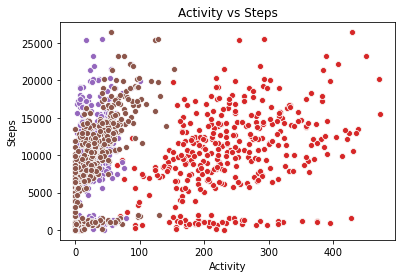

In [34]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
df2 = df[['Minutes Lightly Active','Steps','Minutes Fairly Active','Minutes Very Active']]
# Create a figure of a fixed size and axes
sns.scatterplot(x='Minutes Lightly Active',y='Steps',data=df2,)

ax = plt.gca()
ax.set_title("Graph (a)")
# Iterate to draw each scatter plot
for col in [col for col in df2.columns if col != 'Steps']:
    sns.scatterplot(x=col,y='Steps',data=df2,legend='full').get_legend()
    ax = plt.gca()
    ax.set_title('Activity vs Steps')
    ax.set_xlabel('Activity')
    ax.set_label(col)
    ax.get_legend()
#     leg = ax.axes.flat[0].get_legend()
plt.show()
